<a href="https://colab.research.google.com/github/gilsu200/DL_study/blob/main/midterm_practice_ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

In [ ]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 9ms/step - loss: 0.6228 - accuracy: 0.8092 - val_loss: 0.2778 - val_accuracy: 0.9119
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2538 - accuracy: 0.9205 - val_loss: 0.1718 - val_accuracy: 0.9498
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1660 - accuracy: 0.9478 - val_loss: 0.2133 - val_accuracy: 0.9350
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1173 - accuracy: 0.9633 - val_loss: 0.1400 - val_accuracy: 0.9592
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0869 - accuracy: 0.9727 - val_loss: 0.1431 - val_accuracy: 0.9568
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.1136 - val_accuracy: 0.9655
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.1329 - val_accuracy: 0.9628
Epoch

**검증 정확도 비교 그래프 그리기**

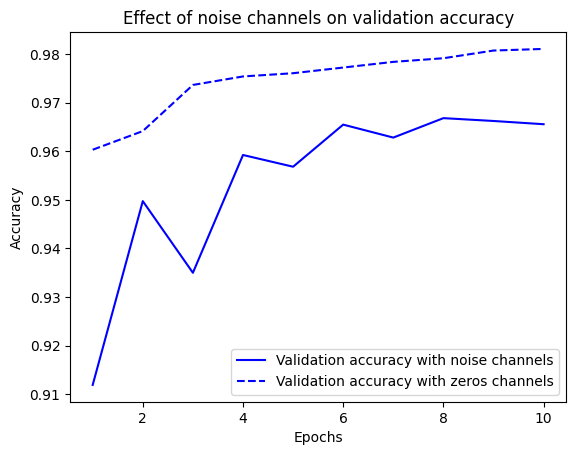

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3164 - accuracy: 0.1027 - val_loss: 2.3049 - val_accuracy: 0.1126
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2995 - accuracy: 0.1163 - val_loss: 2.3101 - val_accuracy: 0.1026
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2933 - accuracy: 0.1248 - val_loss: 2.3154 - val_accuracy: 0.1044
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2811 - accuracy: 0.1371 - val_loss: 2.3243 - val_accuracy: 0.1028
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2674 - accuracy: 0.1470 - val_loss: 2.3331 - val_accuracy: 0.1015
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2484 - accuracy: 0.1634 - val_loss: 2.3536 - val_accuracy: 0.0988
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2268 - accuracy: 0.1769 - val_loss: 2.3561 - val_accuracy: 0.1054

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 541.3621 - accuracy: 0.2258 - val_loss: 2.3114 - val_accuracy: 0.1538
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5267 - accuracy: 0.1457 - val_loss: 2.3458 - val_accuracy: 0.1092
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4123 - accuracy: 0.1374 - val_loss: 2.3733 - val_accuracy: 0.1179
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4322 - accuracy: 0.1419 - val_loss: 2.3980 - val_accuracy: 0.1342
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4265 - accuracy: 0.1409 - val_loss: 2.4364 - val_accuracy: 0.1612
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4295 - accuracy: 0.1494 - val_loss: 2.3139 - val_accuracy: 0.1451
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4521 - accuracy: 0.1700 - val_loss: 3.4476 - val_accuracy: 0.1181
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3623 - accuracy: 0.9117 - val_loss: 0.2165 - val_accuracy: 0.9358
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1231 - accuracy: 0.9651 - val_loss: 0.1410 - val_accuracy: 0.9670
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0971 - accuracy: 0.9749 - val_loss: 0.1284 - val_accuracy: 0.9700
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9798 - val_loss: 0.1609 - val_accuracy: 0.9718
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9831 - val_loss: 0.1728 - val_accuracy: 0.9708
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9850 - val_loss: 0.1639 - val_accuracy: 0.9745
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9872 - val_loss: 0.1858 - val_accuracy: 0.9724
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6748 - accuracy: 0.8364 - val_loss: 0.3589 - val_accuracy: 0.9043
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.9047 - val_loss: 0.3101 - val_accuracy: 0.9144
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.9125 - val_loss: 0.2924 - val_accuracy: 0.9188
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3011 - accuracy: 0.9160 - val_loss: 0.2856 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2918 - accuracy: 0.9186 - val_loss: 0.2774 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.9206 - val_loss: 0.2751 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2802 - accuracy: 0.9212 - val_loss: 0.2717 - val_accuracy: 0.9262
Epoch 

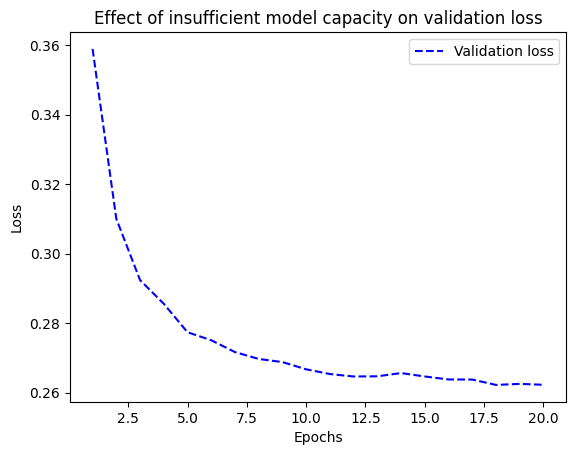

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3610 - accuracy: 0.8988 - val_loss: 0.1948 - val_accuracy: 0.9442
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1629 - accuracy: 0.9511 - val_loss: 0.1483 - val_accuracy: 0.9551
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1155 - accuracy: 0.9655 - val_loss: 0.1180 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0885 - accuracy: 0.9737 - val_loss: 0.1015 - val_accuracy: 0.9697
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9788 - val_loss: 0.0995 - val_accuracy: 0.9697
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0941 - val_accuracy: 0.9721
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.0942 - val_accuracy: 0.9719
Epoch 

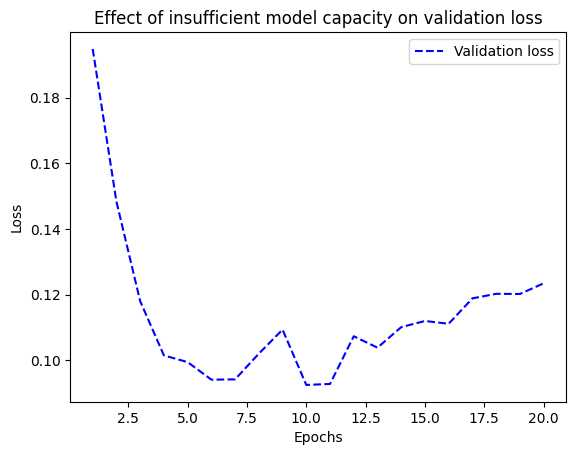

In [10]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 77ms/step - loss: 0.5288 - accuracy: 0.7721 - val_loss: 0.3929 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3291 - accuracy: 0.8907 - val_loss: 0.3177 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2472 - accuracy: 0.9185 - val_loss: 0.2836 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1983 - accuracy: 0.9337 - val_loss: 0.2812 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1659 - accuracy: 0.9463 - val_loss: 0.2900 - val_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1433 - accuracy: 0.9560 - val_loss: 0.2882 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1225 - accurac

**작은 용량의 모델**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.6783 - accuracy: 0.6008 - val_loss: 0.6496 - val_accuracy: 0.6143
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6168 - accuracy: 0.6978 - val_loss: 0.5911 - val_accuracy: 0.7616
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5598 - accuracy: 0.7797 - val_loss: 0.5422 - val_accuracy: 0.7771
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5114 - accuracy: 0.8265 - val_loss: 0.5068 - val_accuracy: 0.8098
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4686 - accuracy: 0.8669 - val_loss: 0.4708 - val_accuracy: 0.8412
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4215 - accuracy: 0.8951 - val_loss: 0.4284 - val_accuracy: 0.8688
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3667 - accuracy: 0.9161 - val_loss: 0.3829 - val_accuracy: 0.8800
Epoch 8/20
30

**큰 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5678 - accuracy: 0.7273 - val_loss: 0.3630 - val_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3192 - accuracy: 0.8681 - val_loss: 0.2775 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2439 - accuracy: 0.8995 - val_loss: 0.3225 - val_accuracy: 0.8609
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1812 - accuracy: 0.9323 - val_loss: 0.2736 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1404 - accuracy: 0.9465 - val_loss: 0.2917 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1047 - accuracy: 0.9651 - val_loss: 0.3254 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0866 - accuracy: 0.9719 - val_loss: 0.3677 - val_accuracy: 0.8852
Epoch 8/20
30

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6123 - accuracy: 0.7696 - val_loss: 0.4708 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4111 - accuracy: 0.8850 - val_loss: 0.3950 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3347 - accuracy: 0.9133 - val_loss: 0.3682 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2962 - accuracy: 0.9271 - val_loss: 0.3612 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2781 - accuracy: 0.9301 - val_loss: 0.3625 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2583 - accuracy: 0.9391 - val_loss: 0.4086 - val_accuracy: 0.8661
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2502 - accuracy: 0.9431 - val_loss: 0.3926 - val_accuracy: 0.8757
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 68ms/step - loss: 0.6565 - accuracy: 0.6075 - val_loss: 0.5855 - val_accuracy: 0.7109
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5686 - accuracy: 0.7576 - val_loss: 0.5064 - val_accuracy: 0.8635
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.5022 - accuracy: 0.8221 - val_loss: 0.4443 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4443 - accuracy: 0.8557 - val_loss: 0.4019 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4011 - accuracy: 0.8775 - val_loss: 0.3735 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3599 - accuracy: 0.8951 - val_loss: 0.3521 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3266 - accuracy: 0.9048 - val_loss: 0.3288 - val_accuracy: 0.8889
Epoch 8/20
30

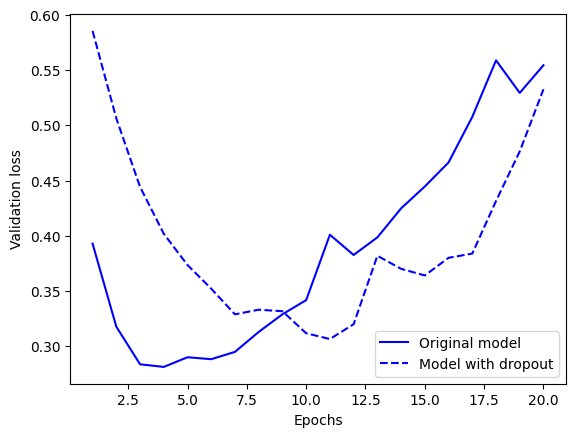

In [17]:
# prompt: Visualize validation loss of the original model and model with dropout

import matplotlib.pyplot as plt

val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, len(val_loss_original) + 1)

plt.plot(epochs, val_loss_original, "b-", label="Original model")
plt.plot(epochs, val_loss_dropout, "b--", label="Model with dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()
plt.show()


## 요약